In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loan_data = pd.read_csv('/Users/Pawan Kumar/Downloads/loan_borowwer_data.csv')

In [129]:
Loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [130]:
# Loan_data.isna().sum()

In [131]:
status = pd.get_dummies(Loan_data.purpose, drop_first=True)

In [132]:
Loan_data = pd.concat([Loan_data, status], axis = 1)

In [133]:
Loan_data.drop('purpose', axis =1, inplace=True)

In [134]:
Loan_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [135]:
# Normalising the continuous variables:
df = Loan_data[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']]

In [136]:
Normalized_df = (df- df.mean())/df.std()

In [137]:
Loan_data = Loan_data.drop(['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util'], axis =1)

In [138]:
Loan_data = pd.concat([Loan_data, Normalized_df], axis =1)

In [139]:
Loan_data

,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,1,0,0,0,0,0,1,0,0,0,0,-0.139310,2.462971,0.680353,0.998453,0.688789,0.432207,0.353714,0.182694
1,1,0,0,0,0,1,0,0,0,0,0,-0.578838,-0.438832,0.244018,0.244528,-0.101297,-0.721192,0.494992,1.030549
2,1,1,0,0,0,0,1,0,0,0,0,0.486458,0.230696,-0.908612,-0.141877,-0.759703,0.059767,-0.397052,-0.730645
3,1,1,0,0,0,0,1,0,0,0,0,-0.813501,-0.756983,0.680353,-0.654663,0.030384,-0.745239,0.496295,0.909919
4,1,0,1,0,0,1,0,0,0,0,0,0.743470,-1.043937,0.597930,0.343308,-1.154746,-0.198150,-0.360644,-0.251573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0,0,1,0,0,0,0,0,0,0.873839,0.123970,2.030924,-0.322006,-1.023065,2.368201,5.879160,1.216663
9574,0,5,0,0,1,0,0,0,0,0,0,0.099078,-0.296465,0.341152,-1.800804,0.293746,-0.072396,-0.495612,-1.575053
9575,0,8,0,0,1,0,1,0,0,0,0,-0.578838,-1.068615,-0.545666,0.070210,-0.628022,-0.444836,-0.203754,1.244235
9576,0,5,0,0,1,0,0,0,1,0,0,1.391588,0.156905,-0.182720,0.954874,-0.496340,-1.105664,-0.501063,-1.502675


In [140]:
x = Loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business']]


In [141]:
y = Loan_data['not.fully.paid']

In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=110)

In [143]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                            GLM   Df Residuals:                     6685
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.9
Date:                Wed, 26 Feb 2020   Deviance:                       5535.8
Time:                        20:48:17   Pearson chi2:                 6.59e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4849      0.119    -12.501      0.000      -1.718      -1.252
credit.policy         -0.3479      0.100     -3.493      0.000      -0.543      -0.153
int.rate               0.0806      0.055      1.459      0.145      -0.028       0.189
installment            0.2266      0.043      5.279      0.000       0.142       0.311
log.annual.inc        -0.2114      0.043     -4.886      0.000      -0.296      -0.127
dti                    0.0056      0.038      0.149      0.882      -0.068       0.079
fico                  -0.3202      0.064     -4.986      0.000      -0.446      -0.194
days.with.cr.line      0.0383      0.039      0.987      0.323      -0.038       0.114
revol.bal              0.0718      0.036      2.011      0.044       0.002       0.142
revol.util             0.0916      0.044      2.065      0.039       0.005       0.178
inq.last.6mths         0.0775      0.016      4.901      0.000       0.047       0.109
delinq.2yrs           -0.0970      0.065     -1.486      0.137      -0.225       0.031
pub.rec                0.2310      0.116      1.986      0.047       0.003       0.459
credit_card           -0.4710      0.130     -3.620      0.000      -0.726      -0.216
debt_consolidation    -0.3015      0.093     -3.246      0.001      -0.484      -0.119
educational            0.1040      0.182      0.572      0.567      -0.253       0.461
home_improvement       0.1625      0.149      1.091      0.275      -0.129       0.454
major_purchase        -0.1768      0.194     -0.913      0.361      -0.557       0.203
small_business         0.5870      0.139      4.214      0.000       0.314       0.860
======================================================================================
"""

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:

# # we check the Heat map for correlation
# plt.figure(figsize = (20,15))        # Size of the figure
# sns.heatmap(Loan_data.corr(),annot = True)

In [146]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# from sklearn.feature_selection import RFE
# rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
# rfe = rfe.fit(x,y)
# print(rfe.support_)           # Printing the boolean results
# print(rfe.ranking_)           # Printing the ranking

In [147]:
# USing VIF
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [148]:
Loan_data.columns

Index(['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business', 'int.rate',
       'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util'],
      dtype='object')

In [149]:
vif_cal(input_data=Loan_data, dependent_col='not.fully.paid')


,Var,Vif
14,fico,3.43
0,credit.policy,3.10
10,int.rate,2.95
17,revol.util,1.77
11,installment,1.67
12,log.annual.inc,1.56
1,inq.last.6mths,1.45
16,revol.bal,1.31
15,days.with.cr.line,1.30
13,dti,1.23


In [152]:
# Loan_data = Loan_data.drop(['dti','fico'], axis =1)

In [153]:
Loan_data

,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,days.with.cr.line,revol.bal,revol.util
0,1,0,0,0,0,0,1,0,0,0,0,-0.139310,2.462971,0.680353,0.432207,0.353714,0.182694
1,1,0,0,0,0,1,0,0,0,0,0,-0.578838,-0.438832,0.244018,-0.721192,0.494992,1.030549
2,1,1,0,0,0,0,1,0,0,0,0,0.486458,0.230696,-0.908612,0.059767,-0.397052,-0.730645
3,1,1,0,0,0,0,1,0,0,0,0,-0.813501,-0.756983,0.680353,-0.745239,0.496295,0.909919
4,1,0,1,0,0,1,0,0,0,0,0,0.743470,-1.043937,0.597930,-0.198150,-0.360644,-0.251573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0,0,1,0,0,0,0,0,0,0.873839,0.123970,2.030924,2.368201,5.879160,1.216663
9574,0,5,0,0,1,0,0,0,0,0,0,0.099078,-0.296465,0.341152,-0.072396,-0.495612,-1.575053
9575,0,8,0,0,1,0,1,0,0,0,0,-0.578838,-1.068615,-0.545666,-0.444836,-0.203754,1.244235
9576,0,5,0,0,1,0,0,0,1,0,0,1.391588,0.156905,-0.182720,-1.105664,-0.501063,-1.502675


In [154]:
vif_cal(input_data=Loan_data, dependent_col='not.fully.paid')

,Var,Vif
0,credit.policy,3.00
10,int.rate,1.75
12,log.annual.inc,1.53
15,revol.util,1.50
11,installment,1.48
1,inq.last.6mths,1.45
14,revol.bal,1.28
13,days.with.cr.line,1.21
2,delinq.2yrs,1.15
3,pub.rec,1.09


In [156]:
x = Loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business']]


In [157]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size = 0.30, random_state=110)
logm1 = sm.GLM(y_train2,(sm.add_constant(x_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                            GLM   Df Residuals:                     6687
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.6
Date:                Wed, 26 Feb 2020   Deviance:                       5561.3
Time:                        20:51:51   Pearson chi2:                 6.57e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4180      0.117    -12.099      0.000      -1.648      -1.188
credit.policy         -0.4455      0.098     -4.560      0.000      -0.637      -0.254
int.rate               0.2484      0.043      5.719      0.000       0.163       0.334
installment            0.1604      0.041      3.937      0.000       0.081       0.240
log.annual.inc        -0.2095      0.043     -4.878      0.000      -0.294      -0.125
days.with.cr.line     -0.0049      0.038     -0.130      0.897      -0.079       0.069
revol.bal              0.0647      0.035      1.873      0.061      -0.003       0.132
revol.util             0.1719      0.041      4.219      0.000       0.092       0.252
inq.last.6mths         0.0764      0.016      4.894      0.000       0.046       0.107
delinq.2yrs           -0.0260      0.061     -0.424      0.672      -0.146       0.094
pub.rec                0.2932      0.116      2.530      0.011       0.066       0.520
credit_card           -0.4419      0.130     -3.412      0.001      -0.696      -0.188
debt_consolidation    -0.2664      0.092     -2.892      0.004      -0.447      -0.086
educational            0.1220      0.181      0.672      0.501      -0.234       0.478
home_improvement       0.1605      0.148      1.082      0.279      -0.130       0.451
major_purchase        -0.1931      0.193     -0.999      0.318      -0.572       0.186
small_business         0.4709      0.137      3.435      0.001       0.202       0.740
======================================================================================
"""

In [158]:
x = Loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec','credit_card', 'debt_consolidation', 'small_business']]

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=110)
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                            GLM   Df Residuals:                     6692
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.3
Date:                Wed, 26 Feb 2020   Deviance:                       5564.6
Time:                        20:54:21   Pearson chi2:                 6.57e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4018      0.108    -12.992      0.000      -1.613      -1.190
credit.policy         -0.4454      0.097     -4.579      0.000      -0.636      -0.255
int.rate               0.2457      0.042      5.805      0.000       0.163       0.329
installment            0.1638      0.040      4.045      0.000       0.084       0.243
log.annual.inc        -0.2111      0.041     -5.118      0.000      -0.292      -0.130
revol.bal              0.0658      0.034      1.925      0.054      -0.001       0.133
revol.util             0.1745      0.040      4.330      0.000       0.095       0.253
inq.last.6mths         0.0777      0.016      4.988      0.000       0.047       0.108
pub.rec                0.2910      0.115      2.529      0.011       0.066       0.517
credit_card           -0.4659      0.122     -3.817      0.000      -0.705      -0.227
debt_consolidation    -0.2904      0.081     -3.578      0.000      -0.450      -0.131
small_business         0.4470      0.129      3.462      0.001       0.194       0.700
======================================================================================
"""

In [160]:
Loan_data = Loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec','credit_card', 'debt_consolidation', 'small_business','not.fully.paid']]

In [161]:
vif_cal(input_data=Loan_data, dependent_col='not.fully.paid')

,Var,Vif
0,credit.policy,2.29
1,int.rate,1.61
5,revol.util,1.46
2,installment,1.45
3,log.annual.inc,1.42
6,inq.last.6mths,1.34
4,revol.bal,1.25
7,pub.rec,1.08
8,credit_card,0.25
10,small_business,0.21


In [164]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train, y_train)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
# Predicted probabilities
y_pred = logsk.predict_proba(x_test)

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [169]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [170]:
# Let's see the head
y_pred_1.head()

,1
0,0.088081
1,0.089709
2,0.188291
3,0.060040
4,0.302390


In [171]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [172]:
from sklearn import metrics

In [173]:
y_predicted = logsk.predict(x_test)

In [176]:
print('The accuracay obtained by Logitic regression is:',metrics.accuracy_score(y_test, y_predicted))

The accuracay obtained by Logitic regression is: 0.8451635351426583


In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [178]:
y_pred =DTC.predict(x_test)

In [180]:
print(metrics.accuracy_score(y_test, y_pred))

0.7390396659707724


In [181]:
rand = RandomForestClassifier(random_state=110)
rand.fit(x_train, y_train)


C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=110,
                       verbose=0, warm_start=False)

In [77]:
y_predR = rand.predict(x_test)

In [183]:
print(metrics.accuracy_score(y_test, y_predicted))

0.8451635351426583


In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

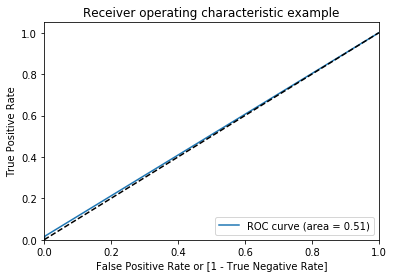

(array([0.        , 0.00288303, 1.        ]),
 array([0.        , 0.01793722, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [185]:
draw_roc(y_test, y_predicted)